In [1]:
import numpy as np
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
df = pd.read_csv('fifa_cleaned.csv')

In [4]:
df.describe()

,id,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,215411.087780,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,...,48.357302,58.680183,47.162861,47.733040,45.705915,16.784449,16.556199,16.388660,16.541049,16.874067
std,29758.387106,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,...,15.810844,11.625541,20.037346,21.674973,21.285812,17.893895,17.108234,16.701447,17.231495,18.182943
min,16.000000,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,...,5.000000,12.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,201117.250000,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,38.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,222919.000000,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.500000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,237613.500000,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,247607.000000,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,93.000000,90.000000,90.000000,92.000000,92.000000,90.000000,94.000000


In [5]:
df = df[['age','overall_rating','potential','international_reputation(1-5)','value_euro']]
df

,age,overall_rating,potential,international_reputation(1-5),value_euro
0,31,94,94,5,110500000.0
1,27,88,89,3,69500000.0
2,25,88,91,4,73000000.0
3,27,88,88,3,62000000.0
4,27,88,91,3,60000000.0
...,...,...,...,...,...
17949,25,67,70,1,975000.0
17950,23,59,67,1,190000.0
17951,22,59,67,1,170000.0
17952,21,59,71,1,280000.0


In [6]:
df.isnull().sum()

age                                0
overall_rating                     0
potential                          0
international_reputation(1-5)      0
value_euro                       255
dtype: int64

In [7]:
df.shape

(17954, 5)

In [8]:
val = 17954 - 255
val

17699

In [9]:
df =  df.dropna(axis=0)

In [10]:
df.shape

(17699, 5)

<AxesSubplot:xlabel='overall_rating', ylabel='value_euro'>

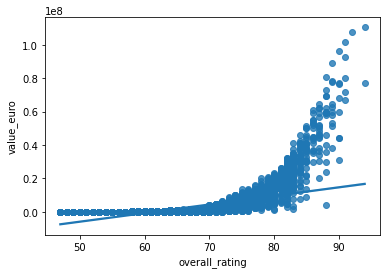

In [11]:
sns.regplot(x=df['overall_rating'], y='value_euro',data=df)

In [12]:
df.value_euro.std()

5687013.850993571

In [13]:
df.columns

Index(['age', 'overall_rating', 'potential', 'international_reputation(1-5)',
       'value_euro'],
      dtype='object')

In [14]:
#df_mini_sample = df[['overall_rating','potential', 'international_reputation(1-5)', 'value_euro']].head(12)
df_mini_sample = df[['overall_rating','potential', 'international_reputation(1-5)', 'value_euro']]

In [15]:
#df_mini_sample.to_csv('fifa_short.csv')

## Mini dataset

In [16]:
X_mini = df_mini_sample[['overall_rating','potential', 'international_reputation(1-5)']].values
y_mini = df_mini_sample.value_euro

In [17]:
X_mini_train = X_mini[:-4,:]
X_mini_test  = X_mini[-4:,:]
y_mini_train  = y_mini[:-4,]
y_mini_test  = y_mini[-4:,]

(-1.0, 116503149.54505505)

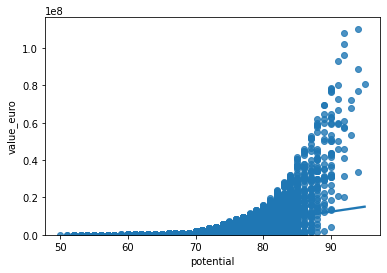

In [18]:
sns.regplot(x=df_mini_sample.potential ,y=df_mini_sample.value_euro, data=df_mini_sample)
plt.ylim(-1)

## Modelamiento Polinomial

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(X_mini,y_mini)

LinearRegression()

In [22]:
X_mini_test

array([[59, 67,  1],
       [59, 67,  1],
       [59, 71,  1],
       [59, 75,  1]], dtype=int64)

In [23]:
y_pred_enf1 = lr.predict(X_mini_test) 

In [24]:
ype1_round = np.round(y_pred_enf1)

In [25]:
ype1_round

array([-776743., -776743.,  180115., 1136973.])

## Cálculo con el enfoque train test split

In [26]:
lr2 = LinearRegression()

In [27]:
lr2.fit(X_mini_train, y_mini_train)

LinearRegression()

In [28]:
y_pred2 = lr2.predict(X_mini_test)

In [29]:
ype2_round = np.round(y_pred2)
ype2_round

array([-776895., -776895.,  180031., 1136957.])